# Predicción del rating de Las aplicaciones en Google Play Store

[Edimer David Jaramillo (Sidereus)](https://edimer.github.io/)

![](competencia.PNG)

# Variables

![](variables.PNG)

# Datos Train

In [1]:
import pandas as pd

In [33]:
data_train = pd.read_csv("../data/train1.csv")
print(data_train.head)

<bound method NDFrame.head of                                               App            Category  Rating  \
0                            GPS Status & Toolbox    Travel_and_local       1   
1                                    Fish|Hunt FL           Lifestyle       0   
2                       Allrecipes Dinner Spinner      Food_and_drink       1   
3                            Don't touch my phone               Tools       0   
4                                 BM SPM Practice              Family       1   
...                                           ...                 ...     ...   
5783                           WhatsApp Messenger       Communication       1   
5784                                      DT NO.I  Health_and_fitness       0   
5785           MyRadar NOAA Weather Radar Ad Free             Weather       1   
5786  Account Class-12 Solutions (D K Goel) Vol-1              Family       1   
5787                 Join R, Community Engagement              Social       1  

In [34]:
data_train.shape

(5788, 17)

In [35]:
data_train.dtypes

App                object
Category           object
Rating              int64
Reviews             int64
Type               object
content_rating     object
new_genres         object
date_update        object
new_day             int64
new_year            int64
size_kb           float64
new_installs      float64
new_price         float64
new_month_num       int64
new_version       float64
new_subversion    float64
min_android       float64
dtype: object

# Datos Test

In [36]:
data_test = pd.read_csv("../data/test1.csv")
print(data_test.head)

<bound method NDFrame.head of                                                     App          Category  \
0                                          Bk Usha behn         Lifestyle   
1                                       Funny Ringtones   Personalization   
2                                             Strava.cz          Shopping   
3                                    BL Flowers Digital          Shopping   
4     eCooltra: scooter sharing. Share electric scoo...  Travel_and_local   
...                                                 ...               ...   
1443                                           Fossil Q         Lifestyle   
1444                       Co-op Credit Union on the Go           Finance   
1445                               EXOGEN Connects (US)           Medical   
1446                                             myGrow      Productivity   
1447                                          EZ PZ RPG            Family   

      Reviews  Type content_rating       new_

In [37]:
data_test.shape

(1448, 16)

In [38]:
data_test.dtypes

App                object
Category           object
Reviews             int64
Type               object
content_rating     object
new_genres         object
date_update        object
new_day             int64
new_year            int64
size_kb           float64
new_installs      float64
new_price         float64
new_month_num       int64
new_version       float64
new_subversion    float64
min_android       float64
dtype: object

# Data Submission

In [94]:
data_sub = pd.read_csv("../data/sample_submission.csv")

# Seleccionando variables para modelos

In [45]:
# Selección de columnnas
mi_train = data_train.drop(["App", "date_update"], axis = 1)
mi_test = data_test.drop(["App", "date_update"], axis = 1)

# Partición en Train-Validation

In [52]:
data = mi_train.sample(frac = 0.95, random_state = 786)
data_validation = mi_train.drop(data.index)
data.reset_index(inplace = True, drop = True)
data_validation.reset_index(inplace = True, drop = True)
print('Datos para modelación (train): ' + str(data.shape))
print('Datos para predicción (validation): ' + str(data_validation.shape))

Datos para modelación (train): (5499, 15)
Datos para predicción (validation): (289, 15)


# `setup()` pycaret

In [53]:
from pycaret.classification import *
mi_config = setup(data = data, target = "Rating", session_id = 1992)

,Description,Value
0,session_id,1992
1,Target,Rating
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5499, 15)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


# Comparando modelos

In [54]:
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7636,0.7511,0.9587,0.7790,0.8595,0.1604,0.2067,3.5450
gbc,Gradient Boosting Classifier,0.7599,0.7428,0.9728,0.7698,0.8595,0.1068,0.1595,0.4550
rf,Random Forest Classifier,0.7586,0.7199,0.9649,0.7722,0.8578,0.1199,0.1664,0.4090
lightgbm,Light Gradient Boosting Machine,0.7576,0.7414,0.9157,0.7946,0.8507,0.2219,0.2398,0.2100
xgboost,Extreme Gradient Boosting,0.7566,0.7240,0.9016,0.8009,0.8482,0.2439,0.2557,0.9860
ada,Ada Boost Classifier,0.7563,0.7182,0.9528,0.7756,0.8551,0.1371,0.1747,0.1920
lr,Logistic Regression,0.7545,0.5369,0.9997,0.7547,0.8601,-0.0005,-0.0029,0.6860
lda,Linear Discriminant Analysis,0.7519,0.6185,0.9769,0.7617,0.8560,0.0514,0.0918,0.0640
ridge,Ridge Classifier,0.7514,0.0000,0.9911,0.7556,0.8575,0.0071,0.0225,0.0280
et,Extra Trees Classifier,0.7282,0.6310,0.9119,0.7703,0.8351,0.0926,0.1049,0.4350


In [57]:
# Mejor modelo basado en Accuracy
modelos

# Modelo *Catboost*

In [58]:
modelo_catboost = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7662,0.7670,0.9519,0.7847,0.8602,0.1846,0.2231
1,0.7662,0.7660,0.9519,0.7847,0.8602,0.1846,0.2231
2,0.7273,0.7023,0.9210,0.7657,0.8362,0.0617,0.0727
3,0.7610,0.8024,0.9553,0.7787,0.8580,0.1507,0.1901
4,0.7766,0.7333,0.9794,0.7808,0.8689,0.1749,0.2484
5,0.7610,0.7207,0.9552,0.7781,0.8576,0.1613,0.2019
6,0.7714,0.7358,0.9690,0.7806,0.8646,0.1826,0.2404
7,0.7844,0.7500,0.9759,0.7883,0.8721,0.2327,0.3021
8,0.7610,0.7886,0.9759,0.7690,0.8602,0.1121,0.1702
9,0.7604,0.7449,0.9517,0.7797,0.8571,0.1584,0.1954


# Tuning *Catboost*

In [59]:
tuned_catboost = tune_model(modelo_catboost, optimize="F1", n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7766,0.7567,0.9759,0.7824,0.8685,0.1830,0.2508
1,0.7714,0.7485,0.9691,0.7812,0.8650,0.1720,0.2286
2,0.7455,0.7006,0.9485,0.7688,0.8492,0.0867,0.1121
3,0.7714,0.8010,0.9691,0.7812,0.8650,0.1720,0.2286
4,0.7792,0.7100,0.9931,0.7769,0.8718,0.1555,0.2620
5,0.7662,0.7168,0.9759,0.7732,0.8628,0.1398,0.2034
6,0.7610,0.7322,0.9724,0.7705,0.8598,0.1207,0.1756
7,0.7714,0.7518,0.9759,0.7775,0.8654,0.1670,0.2339
8,0.7584,0.7837,0.9759,0.7669,0.8589,0.0980,0.1525
9,0.7578,0.7417,0.9483,0.7790,0.8554,0.1532,0.1870


# Rendimiento del modelo

## Curvas ROC

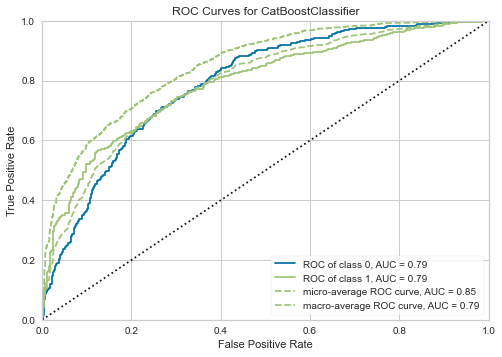

In [60]:
plot_model(tuned_catboost, plot = 'auc')

## Curva Precisión-Recall

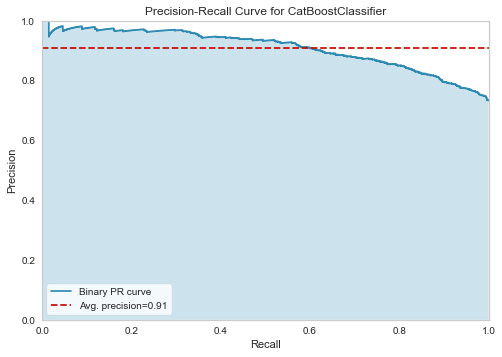

In [61]:
plot_model(tuned_catboost, plot = 'pr')

## Matriz de confusión

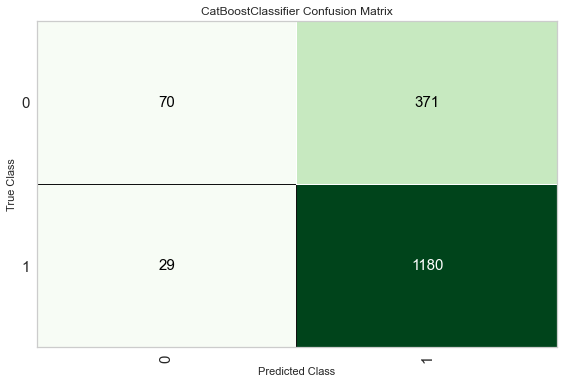

In [62]:
plot_model(tuned_catboost, plot = 'confusion_matrix')

## Reporte de clasificación

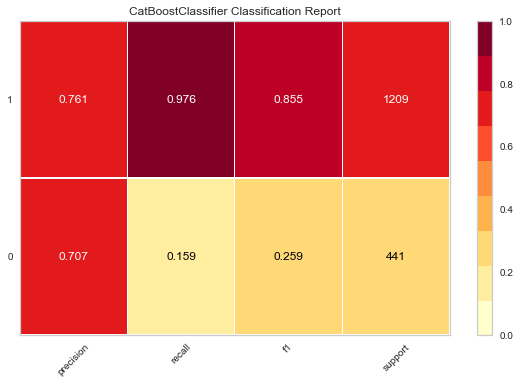

In [64]:
plot_model(tuned_catboost, plot = "class_report")

## Importancia de variables

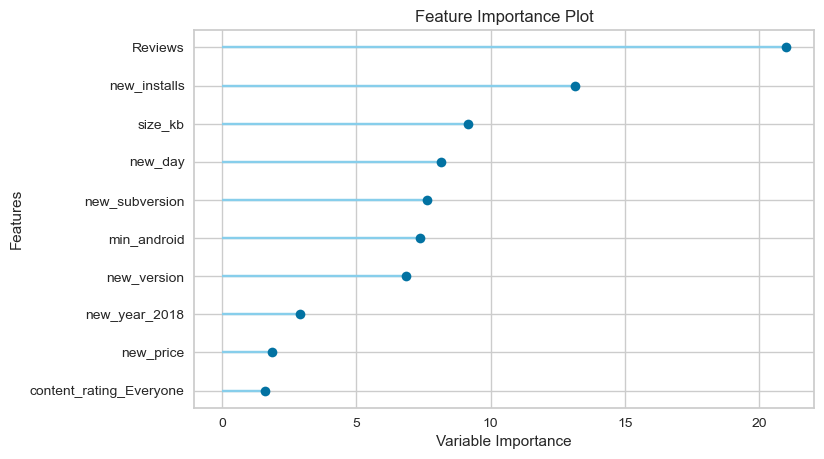

In [65]:
plot_model(tuned_catboost, plot='feature')

# Predicción Interna

In [67]:
predict_model(tuned_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7576,0.7910,0.9760,0.7608,0.8551,0.1788,0.2511


# Finalizando ajusta de *Catboost*

In [68]:
final_catboost = finalize_model(tuned_catboost)
final_catboost

# Predicción submission

In [69]:
predict_submission = predict_model(final_catboost, data=mi_test)
predict_submission.head()

,Category,Reviews,Type,content_rating,new_genres,new_day,new_year,size_kb,new_installs,new_price,new_month_num,new_version,new_subversion,min_android,Label,Score
0,Lifestyle,10,Free,Everyone,Lifestyle,14,2018,3000.0,1000.0,0.0,1,1.0,0.0,4.1,1,0.7266
1,Personalization,7146,Free,Everyone 10+,Personalization,2,2018,14000.0,1000000.0,0.0,2,1.0,1.0,4.0,1,0.8289
2,Shopping,2221,Free,Everyone,Shopping,10,2018,NaN,100000.0,0.0,7,NaN,NaN,NaN,1,0.6007
3,Shopping,21,Free,Everyone,Shopping,31,2017,2500.0,100.0,0.0,10,1.0,6.0,4.2,1,0.8990
4,Travel_and_local,2822,Free,Everyone,Travel & Local,27,2018,27000.0,100000.0,0.0,7,1.0,21.0,4.1,1,0.7768


In [95]:
data_sub["rating"] = predict_submission["Label"]
data_sub.head(10)

,id,rating
0,5788,1
1,5789,1
2,5790,1
3,5791,1
4,5792,1
5,5793,0
6,5794,1
7,5795,1
8,5796,1
9,5797,1


# Exportando predicciones

In [96]:
data_sub.to_csv("../submission/sub_12_catboost.csv", index=False)